In [7]:
# Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

1. Image RGB
Pada tahap ini mengubah piksel gambar asli ke dalam format RGB agar mudah diproses.

cv2 RGB (OpenCV RGB) adalah sebuah format warna yang menggunakan tiga kanal warna (red, green, dan blue) untuk menentukan warna dari sebuah pixel. Format ini digunakan dalam library OpenCV untuk pemrosesan gambar dan video.

368 480


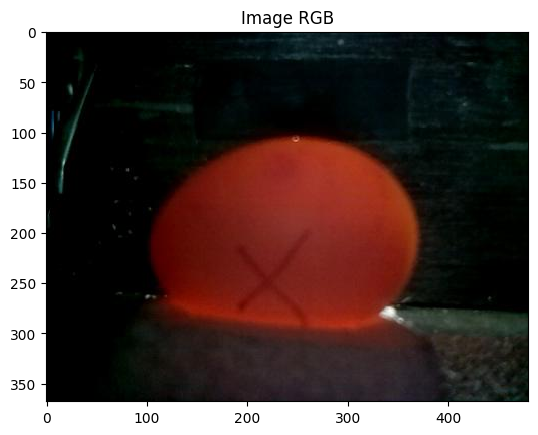

In [8]:
image_bgr = cv2.imread('/content/download (23).jpg')
h,w = image_bgr.shape[:2]
print(h,w)
# image_bgr = image_bgr[
#     0:300, 0:w
# ]
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2BGR)

plt.title('Image RGB')
plt.imshow(image_rgb, interpolation='nearest')

2. image resize (416, 416)
Gambar yang sudah memiliki format RGB diresize menjadi 416x416. Tujuannya adalah untuk mendapatkan ukuran gambar yang seragam dan memudahkan pemrosesan dengan piksel yang lebih sedikit.
cv2.resize() adalah sebuah fungsi dalam library OpenCV yang digunakan untuk mengubah ukuran gambar. Fungsi ini menerima beberapa parameter seperti gambar asli, ukuran yang diinginkan, dan metode interpolasi yang akan digunakan untuk menghitung pixel baru saat gambar diubah ukurannya

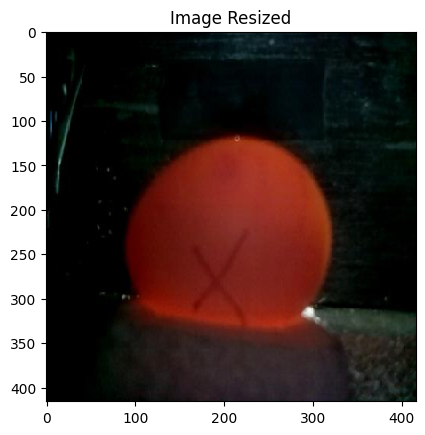

In [9]:
height, width = 416, 416
image_resize = cv2.resize(image_rgb, (width, height), interpolation=cv2.INTER_AREA)

plt.title('Image Resized')
plt.imshow(image_resize, interpolation='nearest')

3. Grayscale
Pada tahap ini mengubah piksel format RGB ke dalam format Grayscale (0-255). Tujuannya adalah untuk mendapatkan gambar fertil yang lebih jelas.

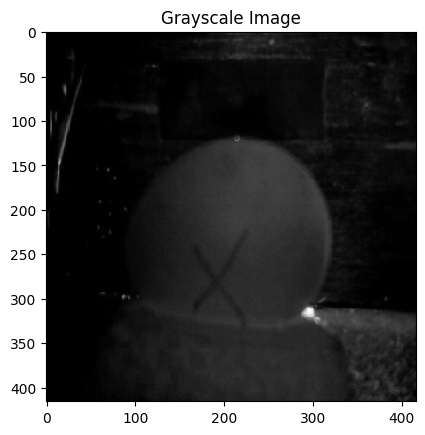

In [10]:
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGR2GRAY)

plt.title('Grayscale Image')
plt.imshow(image_gray, interpolation='nearest', cmap='gray')

# bilateralFilter

cv2.bilateralFilter adalah fungsi dalam library OpenCV yang digunakan untuk melakukan filter bilateral pada sebuah gambar. Argumen yang digunakan dalam fungsi ini adalah sebagai berikut:



*   image_gray: merupakan gambar yang akan difilter, harus dalam bentuk skala keabu-abuan
*   8: merupakan ukuran kernel yang digunakan dalam filter (semakin besar nilainya, semakin besar area yang akan difilter).


*   15: merupakan nilai sigmaColor yang digunakan dalam filter (semakin besar nilainya, semakin besar perbedaan warna yang diizinkan dalam filter)
*   13: merupakan nilai sigmaSpace yang digunakan dalam filter (semakin besar nilainya, semakin besar perbedaan jarak yang diizinkan dalam filter)









Secara umum, filter bilateral digunakan untuk menghilangkan noise dari gambar tanpa menghilangkan detail yang penting. Filter ini bekerja dengan mencari perbedaan warna dan jarak dari setiap pixel dan hanya menghilangkan noise dari pixel yang memiliki perbedaan warna dan jarak yang besar dari pixel sekitarnya.

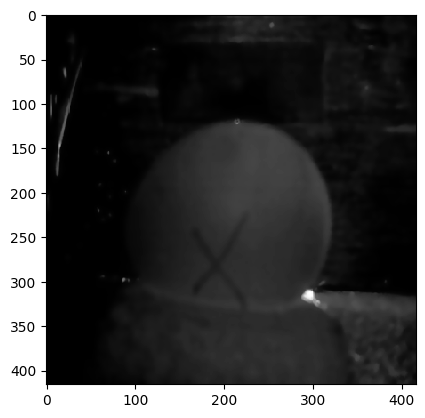

In [11]:
blured = cv2.bilateralFilter(image_gray, 8, 15, 13)
plt.imshow(blured, interpolation='nearest', cmap='gray')

In [12]:
cv2.imwrite('blured_fertile_1.jpg', blured)

True

# objek CLAHE

cv2.createCLAHE adalah fungsi dalam library OpenCV yang digunakan untuk membuat objek CLAHE (Contrast Limited Adaptive Histogram Equalization) yang digunakan untuk meningkatkan kontras gambar. Argumen yang digunakan dalam fungsi ini adalah sebagai berikut:


*   clipLimit: merupakan batas maksimal perbedaan kontras yang diizinkan dalam CLAHE. Semakin besar nilainya, semakin besar kontras yang diizinkan.
*   tileGridSize: merupakan ukuran grid yang digunakan dalam CLAHE. Semakin kecil nilainya, semakin detail kontras yang diizinkan.





Secara umum, CLAHE digunakan untuk meningkatkan kontras gambar yang kurang jelas tanpa mengubah warna atau menambah noise. CLAHE bekerja dengan membagi gambar menjadi beberapa grid dan mengubah distribusi warna pada setiap grid sehingga kontras dalam setiap grid menjadi lebih seimbang

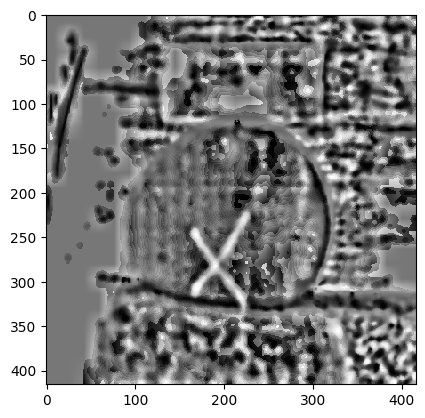

In [13]:
clahe = cv2.createCLAHE(clipLimit=136.0, tileGridSize=(25, 25))
cl1 = clahe.apply(blured)
cl1 = 255 - cl1

plt.imshow(cl1, interpolation='nearest', cmap='gray')

In [14]:
cv2.imwrite('clahe_fertile_1.jpg', blured)

True

# threshold

cv2.threshold adalah fungsi dalam library OpenCV yang digunakan untuk melakukan thresholding pada sebuah gambar. Argumen yang digunakan dalam fungsi ini adalah sebagai berikut:

*   cl1: merupakan gambar yang akan dithresholding
*   150: merupakan nilai ambang batas yang digunakan dalam thresholding. Semua pixel dengan intensitas di bawah nilai ini akan diubah menjadi hitam (0) dan yang di atas akan diubah menjadi putih (255)

*   255: merupakan nilai yang akan di assign untuk pixel yang diatas ambang batas
*   cv2.THRESH_TOZERO: merupakan metode thresholding yang digunakan. THRESH_TOZERO menandakan bahwa pada pixel yang di bawah ambang batas akan diubah menjadi 0, dan yang diatas akan tetap sama.













Secara umum, thresholding adalah proses pembuatan gambar biner dengan cara mengubah semua pixel yang memiliki intensitas di bawah ambang batas menjadi hitam (0) dan yang di atas menjadi putih (255). Pada fungsi ini, cl1 gambar yang di thresholding dengan ambang batas 150, dimana setiap pixel yang intensitasnya di bawah 150 akan diubah menjadi hitam (0) dan yang di atas akan tetap sama.

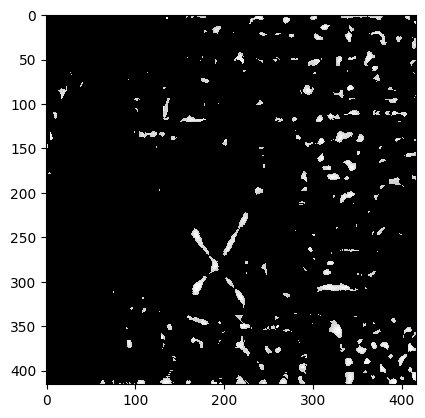

In [15]:
fertile = 120
infertile = 200

ret, thresh = cv2.threshold(cl1, infertile, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh, interpolation='nearest', cmap='gray')

# morfologi

operasi morfologi pada sebuah gambar yang telah di thresholding. Fungsi ini digunakan untuk menghilangkan noise atau memperbesar objek dalam gambar.

*   current dan prev adalah variabel yang digunakan untuk menyimpan gambar yang telah dithresholding dan digunakan untuk mengecek perubahan pada gambar setiap iterasi.
*   kernel3, kernel5, dan kernel7 adalah variabel yang digunakan untuk menyimpan structuring element dalam bentuk elips dengan ukuran 3x3, 5x5, dan 7x7. Structuring element digunakan untuk menentukan bagian dari gambar yang akan diubah saat melakukan operasi morfologi.

*   cv2.morphologyEx(current, cv2.MORPH_OPEN, kernel5) menjalankan operasi morphologi open dengan menggunakan kernel5 sebagai structuring element. Operasi open digunakan untuk menghilangkan noise dalam gambar.
*   iter_num adalah variabel yang digunakan untuk menyimpan jumlah iterasi yang dilakukan

*   max_iter adalah jumlah maksimal iterasi yang diizinkan

while loop digunakan untuk melakukan iterasi dengan kondisi:

*   Jika perbedaan antara current dan prev lebih dari 0, maka loop akan terus berjalan. Perbedaan ini digunakan untuk mengecek apakah ada perubahan pada gambar setelah operasi morfologi dilakukan.
*   Jika iter_num kurang dari max_iter, maka loop akan terus berjalan.

Di dalam loop:

*   iter_num ditambah 1 setiap kali loop .
*   prev di-copy menjadi current

*   cv2.dilate(current, kernel3) menjalankan operasi dilate dengan menggunakan kernel3 sebagai structuring element. Operasi dilate digunakan untuk memperbesar objek dalam gambar.
*   current[np.where(thresh == 0)] = 0 digunakan untuk mengeset pixel yang berwarna hitam (0) pada gambar yang di thresholding menjadi hitam (0) pada gambar yang dioperasikan morphologi.

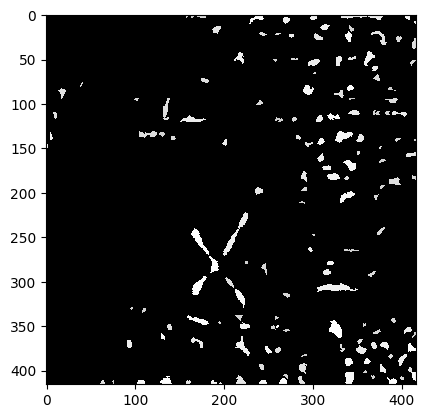

In [16]:
current = np.copy(thresh)
prev = np.copy(current)
prev[:] = 0


kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))


current = cv2.morphologyEx(current, cv2.MORPH_OPEN, kernel3)
iter_num = 0
max_iter = 100

while np.sum(current - prev) > 0 and iter_num < max_iter:
    iter_num = iter_num+1
    prev = np.copy(current)
    current = cv2.dilate(current, kernel3)
    current[np.where(thresh == 0)] = 0

plt.imshow(current, interpolation='nearest', cmap='gray')

# Filter Small object contour

menemukan dan menghapus objek-objek kecil dalam gambar yang telah dioperasikan morfologi.



*   cv2.findContours(current, cv2.RETR_LIST, cv2.
CHAIN_APPROX_SIMPLE) digunakan untuk menemukan semua contours (garis yang mengelilingi objek) dalam gambar current. cv2.RETR_LIST digunakan untuk mengambil semua contours dalam gambar tanpa memperhatikan hierarki (parent-child relationship) antar contours. cv2.CHAIN_APPROX_SIMPLE digunakan untuk mengurangi jumlah titik pada setiap contour.

*   for contour in contours: digunakan untuk mengiterasi setiap contour yang ditemukan.

*   area = cv2.contourArea(contour) digunakan untuk menghitung luas dari setiap contour.

*   if area < 50: digunakan untuk mengecek apakah luas dari contour kurang dari 50. Jika iya, maka contour tersebut dianggap sebagai objek kecil.

*   cv2.drawContours( current, [contour], 0, [0,0,0], -1 ) digunakan untuk menghapus objek kecil tersebut dari gambar current dengan menggambar garis hitam (0,0,0) di atas contour tersebut. -1 digunakan untuk mengisi area dalam garis dengan warna hitam.

Secara umum, kode di bawah digunakan untuk menemukan dan menghapus objek-objek kecil dalam gambar yang telah dioperasikan morfologi dengan menggunakan metode contours dan contour area. Dengan menghapus objek-objek kecil ini, kita dapat meningkatkan efektifitas dari pengolahan gambar yang dilakukan selanjutnya.

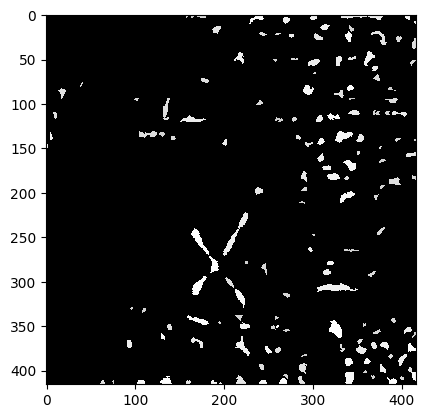

In [17]:
contours, hierarchy = cv2.findContours(current, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    area = cv2.contourArea(contour)
    # print(area)
    if 0 > area < 0:
        cv2.drawContours( current, [contour], 0, [0,0,0], -1 )
plt.imshow(current, interpolation='nearest', cmap='gray')

# Double filter and draw image contour

menemukan dan menandai objek-objek dengan luas tertentu dalam gambar.



*   cv2.findContours(current, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) digunakan untuk menemukan semua contours (garis yang mengelilingi objek) dalam gambar current. cv2.RETR_LIST digunakan untuk mengambil semua contours dalam gambar tanpa memperhatikan hierarki (parent-child relationship) antar contours. cv2.CHAIN_APPROX_SIMPLE digunakan untuk mengurangi jumlah titik pada setiap contour.
for contour in contours: digunakan untuk mengiterasi setiap contour yang ditemukan
*   area = cv2.contourArea(contour) digunakan untuk menghitung luas dari setiap contour.



*   if area > 15 and area < 80: digunakan untuk mengecek apakah luas dari contour lebih besar dari 15 dan kurang dari 80. Jika iya, maka contour tersebut dianggap sebagai objek yang akan ditandai
*   cv2.drawContours(image_resize, [contour], 0, [0,255,0], -1 ) digunakan untuk menandai objek yang ditemukan dengan menggambar garis hijau (0,255,0) di atas contour tersebut. -1 digunakan untuk mengisi area dalam garis dengan warna hijau.
total_area+=1 digunakan untuk menghitung jumlah objek yang ditandai.












Secara umum, kode di bawah digunakan untuk menemukan dan menandai objek-objek dengan luas tertentu dalam gambar. Kode ini dapat digunakan untuk mengidentifikasi objek-objek yang diinginkan dalam gambar dan dapat digunakan untuk melakukan analisis atau pengolahan gambar selanjutnya

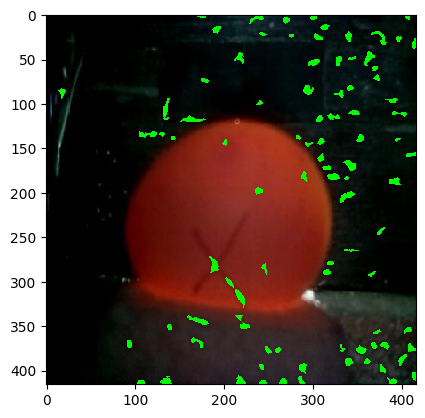

In [18]:
contours, hierarchy = cv2.findContours(current, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
total_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 15 and area < 100:
        cv2.drawContours(image_resize, [contour], 0, [0,255,0], -1 )
        total_area+=1
plt.imshow(image_resize, interpolation='nearest', cmap='gray')

# Classification

mengklasifikasikan gambar berdasarkan jumlah objek yang ditandai.


*   classification = 'Fertil' if total_area > 15 else 'Infertil' digunakan untuk menentukan klasifikasi dari gambar. Jika jumlah objek yang ditandai lebih dari 15, maka gambar dianggap sebagai "Fertil". Jika tidak, maka gambar dianggap sebagai "Infertil".
*   print(f'Jumlah Contour : {total_area}') digunakan untuk mencetak jumlah objek yang ditandai dalam gambar


*   print(f'Classification : {classification}') digunakan untuk mencetak klasifikasi yang ditentukan dari gambar.










Jumlah Contour : 91
Classification : Fertil


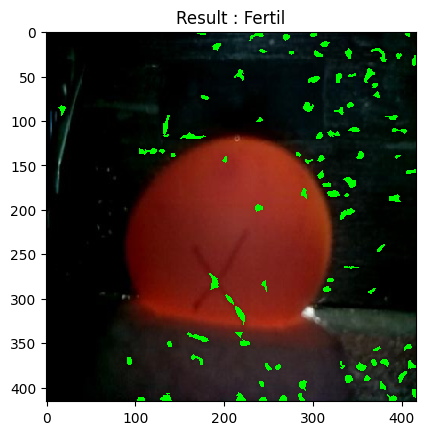

In [19]:
classification = 'Fertil' if total_area >= 15 else 'Infertil'
print(f'Jumlah Contour : {total_area}')
print(f'Classification : {classification}')

plt.title(f'Result : {classification}')
plt.imshow(image_resize, interpolation='nearest')